In [1]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder as OHE, MinMaxScaler
from sklearn.pipeline import Pipeline
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
#import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import recall_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
#from imblearn.over_sampling import SMOTE
#
print("Loaded Libraries")

Loaded Libraries


## Load the data

In [2]:
opp_df = pd.read_csv("../data/predict_cw_data.csv")
print('The data has ', opp_df.shape[0], ' rows and ', opp_df.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(opp_df.columns)))

The data has  3588  rows and  48  columns

column names: 

opp_id
opportunity_name
lead_source
created_date
close_date
opp_type
account_id
account_name
owner_id
rep
product_c
number_of_employees
region
industry
segment
amount
is_closed
is_won
lost_reason
forecast_category
target
stage_name
has_opportunity_line_item
opportunity_age
amount_range
company_size
num_times_pushed
num_calls_attended
outbound_calls_made
conferences_num
average_call_duration_min
num_activity
average_time_between_activities
num_bugs_incident_cases
closed_bugs
open_bugs
num_feature_requests
closed_frs
open_frs
avg_time_taken_to_close_bugs
avg_time_taken_to_close_frs
open_bugs_since_created
open_frs_since_created
avg_days_taken_between_stages
num_products
sum_discounted_price
sum_amount
discount_percentage


In [3]:
opp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   opp_id                           3587 non-null   object 
 1   opportunity_name                 3587 non-null   object 
 2   lead_source                      3584 non-null   object 
 3   created_date                     3587 non-null   object 
 4   close_date                       3587 non-null   object 
 5   opp_type                         3587 non-null   object 
 6   account_id                       3587 non-null   object 
 7   account_name                     3587 non-null   object 
 8   owner_id                         3587 non-null   object 
 9   rep                              3587 non-null   object 
 10  product_c                        3374 non-null   object 
 11  number_of_employees              3327 non-null   float64
 12  region              

In [4]:
missing = pd.concat([opp_df.isnull().sum(), 100 * opp_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values('count', ascending=False)

,count,%
lost_reason,1882,52.452620
company_size,261,7.274247
number_of_employees,261,7.274247
product_c,214,5.964326
lead_source,4,0.111483
opp_id,1,0.027871
amount,1,0.027871
opportunity_name,1,0.027871
opportunity_age,1,0.027871
has_opportunity_line_item,1,0.027871


In [5]:
# Drop null values from all columns except 'product' and 'loss_reason'
opp_df_cleaned = opp_df.dropna(subset=opp_df.columns.difference(['product_c', 'lost_reason']))

In [6]:
opp_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3327 entries, 0 to 3586
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   opp_id                           3327 non-null   object 
 1   opportunity_name                 3327 non-null   object 
 2   lead_source                      3327 non-null   object 
 3   created_date                     3327 non-null   object 
 4   close_date                       3327 non-null   object 
 5   opp_type                         3327 non-null   object 
 6   account_id                       3327 non-null   object 
 7   account_name                     3327 non-null   object 
 8   owner_id                         3327 non-null   object 
 9   rep                              3327 non-null   object 
 10  product_c                        3134 non-null   object 
 11  number_of_employees              3327 non-null   float64
 12  region                   

In [7]:
opp_df_cleaned.head()

,opp_id,opportunity_name,lead_source,created_date,close_date,opp_type,account_id,account_name,owner_id,rep,...,open_frs,avg_time_taken_to_close_bugs,avg_time_taken_to_close_frs,open_bugs_since_created,open_frs_since_created,avg_days_taken_between_stages,num_products,sum_discounted_price,sum_amount,discount_percentage
0,0067F00000ziGOeQAM,Renewal FY2024 RedstoneFCU_CERT+_500 Certificates,Renewal,2021-04-28 14:07:00.000 -0500,2024-07-27,Renewal Business,0017F000005ujMlQAI,Redstone Federal Credit Union (RFCU),0057F000008JXOfQAO,Keerthi Vignesh Rajeswaran,...,1,6,68,0,720,0,1,23000.0,23000.0,0.0
1,0067F000015txKBQAY,EMCOR - CERT+- TBD - Compunet,Partner Portal - Deals,2022-04-08 10:20:23.000 -0500,2023-08-16,LAND,0017F000005uiU3QAI,EMCOR Group,0057F000000VRifQAG,Amit Zanwar,...,0,0,0,0,0,163,0,0.0,0.0,0.0
2,0067F000018VEi6QAG,UPMC-ADC+-Defy,Partner Portal - Deals,2022-11-02 12:56:03.000 -0500,2024-05-21,LAND,0017F000005uk4KQAQ,UPMC,0057F000005wlWKQAY,Ed Skoroda,...,0,0,0,0,0,149,0,0.0,0.0,0.0
3,0067F00001AHdQeQAL,National Bank of Oman - CERT+ - 500,Partner Portal - Deals,2023-05-19 04:12:39.000 -0500,2023-09-07,LAND,0017F00002QnALnQAN,National Bank of Oman,0057F000000VRklQAG,Deepak Rangarajan,...,0,0,0,0,0,100,0,0.0,0.0,0.0
4,0067F0000149lx3QAA,GEP_CERT+ 1000 Certs,Field sourced,2021-12-20 14:28:38.000 -0600,2022-11-18,LAND,0017F00002RpNjaQAF,GEP Worldwide,0057F000000VRifQAG,Amit Zanwar,...,0,0,0,0,0,165,1,50000.0,50000.0,0.0


In [8]:
selected_columns = ['lead_source', 
       'rep', 'region', 'industry',
       'segment',  'opportunity_age', 'amount_range',
       'company_size', 'num_times_pushed', 'num_calls_attended',
       'outbound_calls_made', 'conferences_num', 'average_call_duration_min',
       'num_activity', 'average_time_between_activities',
       'num_bugs_incident_cases', 'closed_bugs', 'open_bugs',
       'num_feature_requests', 'closed_frs', 'open_frs',
       'avg_time_taken_to_close_bugs', 'avg_time_taken_to_close_frs',
       'open_bugs_since_created', 'open_frs_since_created',
       'avg_days_taken_between_stages','target']
opp_df_selected = opp_df_cleaned[selected_columns]
opp_X = opp_df_selected.drop(columns='target')
opp_X.columns

Index(['lead_source', 'rep', 'region', 'industry', 'segment',
       'opportunity_age', 'amount_range', 'company_size', 'num_times_pushed',
       'num_calls_attended', 'outbound_calls_made', 'conferences_num',
       'average_call_duration_min', 'num_activity',
       'average_time_between_activities', 'num_bugs_incident_cases',
       'closed_bugs', 'open_bugs', 'num_feature_requests', 'closed_frs',
       'open_frs', 'avg_time_taken_to_close_bugs',
       'avg_time_taken_to_close_frs', 'open_bugs_since_created',
       'open_frs_since_created', 'avg_days_taken_between_stages'],
      dtype='object')

In [9]:
opp_df_selected['target'].value_counts()

target
0.0    1613
2.0    1081
1.0     633
Name: count, dtype: int64

In [10]:

from sklearn.preprocessing import LabelEncoder

y = opp_df_selected['target']
# Apply label encoding to convert the target variable into numerical format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



In [11]:
y_encoded

array([2, 0, 2, ..., 0, 0, 0], dtype=int64)

In [12]:
opp_X.head()

,lead_source,rep,region,industry,segment,opportunity_age,amount_range,company_size,num_times_pushed,num_calls_attended,...,closed_bugs,open_bugs,num_feature_requests,closed_frs,open_frs,avg_time_taken_to_close_bugs,avg_time_taken_to_close_frs,open_bugs_since_created,open_frs_since_created,avg_days_taken_between_stages
0,Renewal,Keerthi Vignesh Rajeswaran,North America,Banking,Commercial,1016.0,$10000 - $49999,1000 - 4999,3,5,...,3,0,2,1,1,6,68,0,720,0
1,Partner Portal - Deals,Amit Zanwar,North America,Construction,Enterprise,495.0,$10000 - $49999,>= 5000,9,0,...,0,0,0,0,0,0,0,0,0,163
2,Partner Portal - Deals,Ed Skoroda,North America,Hospital & Health care,Enterprise,463.0,>= $100000,>= 5000,5,1,...,0,0,0,0,0,0,0,0,0,149
3,Partner Portal - Deals,Deepak Rangarajan,EMEA,Banking,Commercial,111.0,$50000 - $99999,1000 - 4999,2,0,...,0,0,0,0,0,0,0,0,0,100
4,Field sourced,Amit Zanwar,North America,Logistics and supply Chain,Enterprise,332.0,$50000 - $99999,>= 5000,9,2,...,0,0,0,0,0,0,0,0,0,165


In [13]:
opp_X_final = opp_X.drop(columns=['region','segment','rep'])

In [14]:
opp_X_final.head()

,lead_source,industry,opportunity_age,amount_range,company_size,num_times_pushed,num_calls_attended,outbound_calls_made,conferences_num,average_call_duration_min,...,closed_bugs,open_bugs,num_feature_requests,closed_frs,open_frs,avg_time_taken_to_close_bugs,avg_time_taken_to_close_frs,open_bugs_since_created,open_frs_since_created,avg_days_taken_between_stages
0,Renewal,Banking,1016.0,$10000 - $49999,1000 - 4999,3,5,0,5,43,...,3,0,2,1,1,6,68,0,720,0
1,Partner Portal - Deals,Construction,495.0,$10000 - $49999,>= 5000,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,163
2,Partner Portal - Deals,Hospital & Health care,463.0,>= $100000,>= 5000,5,1,1,0,1,...,0,0,0,0,0,0,0,0,0,149
3,Partner Portal - Deals,Banking,111.0,$50000 - $99999,1000 - 4999,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
4,Field sourced,Logistics and supply Chain,332.0,$50000 - $99999,>= 5000,9,2,1,1,13,...,0,0,0,0,0,0,0,0,0,165


In [15]:
opp_X_final.shape

(3327, 23)

In [16]:
# Check unique categories in the 'Company Size' column
unique_company_sizes = opp_X_final['company_size'].unique()
# Update the company_size_cat list with the unique categories found in the data
company_size_cat = list(unique_company_sizes)

unique_amount_range = opp_X_final['amount_range'].unique()
# Update the company_size_cat list with the unique categories found in the data
amount_range_cat = list(unique_amount_range)
unique_lead_source = opp_X_final['lead_source'].unique()
unique_industry = opp_df_selected['industry'].unique()
ct = ColumnTransformer([
    ("oe", OrdinalEncoder(categories=[company_size_cat, amount_range_cat]), ['company_size', 'amount_range']),
    ("ohe_ls", OneHotEncoder(categories=[unique_lead_source], sparse=False), ['lead_source']),
    ("ohe_ind", OneHotEncoder(categories=[unique_industry], sparse=False), ['industry'])
 
    ], remainder='passthrough')  # Ensure that non-categorical columns are preserved

# Define pipeline
pipe = Pipeline([
    ("preprocessor", ct),
    ("scaler", MinMaxScaler())  # Scale all the values to a 0–1 range
])



In [17]:
# Apply preprocessing and scaling
df_scaled = pipe.fit_transform(opp_X_final)


In [18]:
joblib.dump(pipe, 'opp_pred_pipe.pkl')

['opp_pred_pipe.pkl']

In [19]:
print("Shape of one-hot encoded data:", df_scaled.shape)

Shape of one-hot encoded data: (3327, 242)


In [20]:

# Get the encoded column names
encoded_columns = ct.get_feature_names_out()

# Convert scaled data back to DataFrame using encoded column names
df_scaled = pd.DataFrame(df_scaled, columns=encoded_columns)

In [21]:
df_scaled.head()

,oe__company_size,oe__amount_range,ohe_ls__lead_source_Renewal,ohe_ls__lead_source_Partner Portal - Deals,ohe_ls__lead_source_Field sourced,ohe_ls__lead_source_Expansion,ohe_ls__lead_source_Inbound Direct,ohe_ls__lead_source_Channel Partner,ohe_ls__lead_source_Social Media,ohe_ls__lead_source_Inbound Organic,...,remainder__closed_bugs,remainder__open_bugs,remainder__num_feature_requests,remainder__closed_frs,remainder__open_frs,remainder__avg_time_taken_to_close_bugs,remainder__avg_time_taken_to_close_frs,remainder__open_bugs_since_created,remainder__open_frs_since_created,remainder__avg_days_taken_between_stages
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007371,0.0,0.028571,0.025641,0.019608,0.008186,0.073514,0.0,0.64632,0.0000
1,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.2608
2,0.2,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.2384
3,0.0,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.1600
4,0.2,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.2640


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Define the number of features you want to keep
num_features_to_keep = 20

# Extract features and target variable
X = df_scaled
y = y_encoded

# Train Random Forest classifier to get feature importances
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort feature importances and select top k features
top_feature_indices = feature_importances.argsort()[-num_features_to_keep:][::-1]

# Select top k features from the dataframe
selected_features = X.columns[top_feature_indices]

# Create dataframe with selected features
df_selected_features = df_scaled[selected_features]


In [23]:
df_selected_features.columns

Index(['remainder__avg_days_taken_between_stages',
       'remainder__opportunity_age', 'remainder__num_times_pushed',
       'remainder__num_activity', 'ohe_ls__lead_source_Renewal',
       'remainder__average_call_duration_min', 'oe__amount_range',
       'remainder__num_bugs_incident_cases',
       'remainder__average_time_between_activities',
       'remainder__conferences_num', 'remainder__avg_time_taken_to_close_bugs',
       'remainder__open_bugs_since_created',
       'remainder__open_frs_since_created', 'oe__company_size',
       'remainder__closed_bugs', 'remainder__num_calls_attended',
       'remainder__num_feature_requests', 'remainder__open_bugs',
       'remainder__open_frs', 'ohe_ls__lead_source_Channel Partner'],
      dtype='object')

In [24]:
# Define a function to remove prefixes and extract original feature names
def remove_prefix(feature_name):
    # Split the feature name by '__' and take the last part
    parts = feature_name.split('__')
    return parts[-1]

# Define a mapping dictionary for renaming columns
rename_mapping = {col: remove_prefix(col) for col in df_selected_features}

# Rename the columns in the dataframe
df_selected_features_renamed = df_selected_features.rename(columns=rename_mapping)

In [25]:
df_selected_features_renamed.head()

,avg_days_taken_between_stages,opportunity_age,num_times_pushed,num_activity,lead_source_Renewal,average_call_duration_min,amount_range,num_bugs_incident_cases,average_time_between_activities,conferences_num,avg_time_taken_to_close_bugs,open_bugs_since_created,open_frs_since_created,company_size,closed_bugs,num_calls_attended,num_feature_requests,open_bugs,open_frs,lead_source_Channel Partner
0,0.0000,0.956049,0.107143,0.060103,1.0,0.119777,0.0,0.006961,0.007067,0.030675,0.008186,0.0,0.64632,0.0,0.007371,0.030488,0.028571,0.0,0.019608,0.0
1,0.2608,0.709830,0.321429,0.000395,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.2,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.2384,0.694707,0.178571,0.000000,0.0,0.002786,0.2,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.2,0.000000,0.006098,0.000000,0.0,0.000000,0.0
3,0.1600,0.528355,0.071429,0.000000,0.0,0.000000,0.4,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,0.2640,0.632798,0.321429,0.000000,0.0,0.036212,0.4,0.000000,0.000000,0.006135,0.000000,0.0,0.00000,0.2,0.000000,0.012195,0.000000,0.0,0.000000,0.0


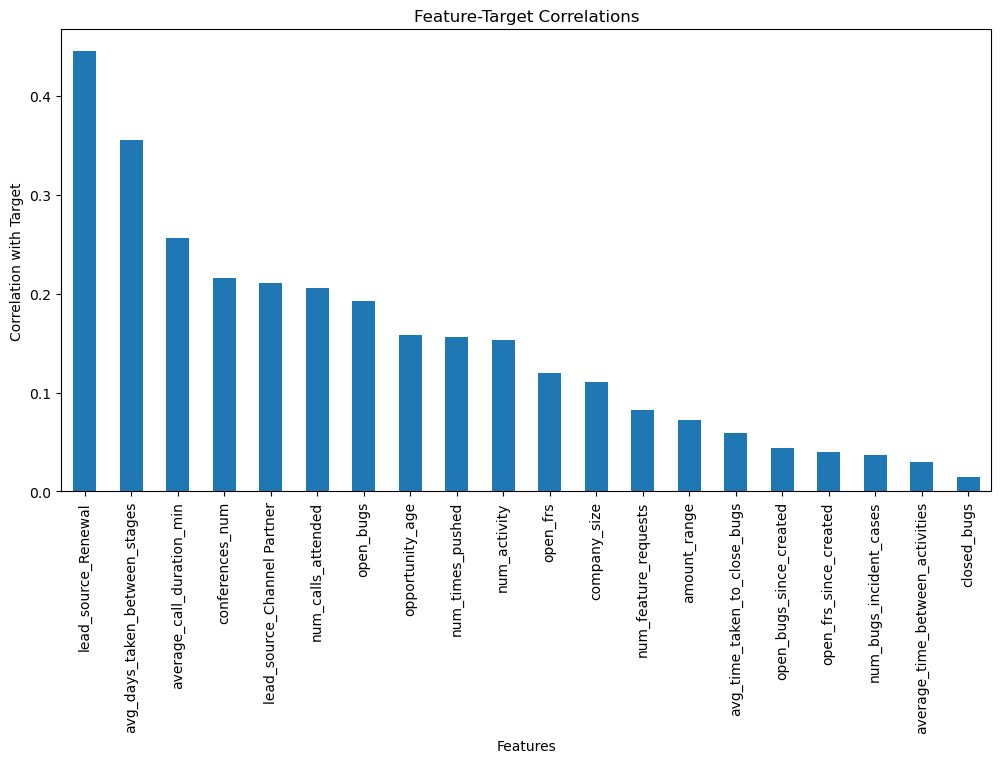

In [26]:
# Calculate the correlation coefficients between selected features and the target variable
feature_target_correlations = df_selected_features_renamed.corrwith(pd.Series(y_encoded))

# Sort the correlations in descending order
feature_target_correlations_sorted = feature_target_correlations.abs().sort_values(ascending=False)

# Visualize feature-target correlations (example: bar plot)
plt.figure(figsize=(12, 6))
feature_target_correlations_sorted.plot(kind='bar')
plt.title('Feature-Target Correlations')
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.xticks(rotation=90)
plt.show()

In [27]:
df_selected_features_renamed.shape

(3327, 20)

In [28]:
y_encoded.shape

(3327,)

In [29]:
# Get the unique values in y_encoded
unique_values = np.unique(y_encoded)

print("Unique values in y_encoded:", unique_values)

Unique values in y_encoded: [0 1 2]


In [31]:
# Combine selected features with the target variable
combined_data = pd.concat([df_selected_features_renamed, pd.Series(y_encoded, name='target')], axis=1)

# Filter for closed opportunities (target values 0 and 1)
closed_opp_df = combined_data[combined_data['target'].isin([0, 1])]


# Split the closed opportunities data into features (X) and target variable (y)
#X_closed_opp = closed_opp_df.drop('target', axis=1)
#y_closed_opp = closed_opp_df['target']

# Split the closed opportunities data into training and testing sets
closed_opp_train, closed_opp_test = train_test_split(closed_opp_df, 
                                                     test_size=0.2, 
                                                     random_state=24)

# Filter for closed opportunities (target values 0 and 1)
#open_opp_df = combined_data[combined_data['target'].isin([2])]

In [32]:
closed_opp_train.shape

(1796, 21)

In [33]:
closed_opp_test.shape

(450, 21)

In [34]:
closed_opp_train_X = closed_opp_train.drop(columns='target')
closed_opp_train_y = closed_opp_train['target'].copy()
closed_opp_test_X = closed_opp_test.drop(columns='target')
closed_opp_test_y = closed_opp_test['target'].copy()

In [35]:
closed_opp_train_X.shape

(1796, 20)

In [36]:
closed_opp_train_y.shape

(1796,)

In [37]:
closed_opp_test_X.shape

(450, 20)

In [38]:
closed_opp_test_y.shape

(450,)

In [39]:
# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(closed_opp_train_X, closed_opp_train_y)

# Predictions on the testing set
y_pred = model.predict(closed_opp_test_X)

# Evaluate the model
accuracy = accuracy_score(closed_opp_test_y, y_pred)
classification_report_result = classification_report(closed_opp_test_y, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       312
           1       0.77      0.62      0.69       138

    accuracy                           0.83       450
   macro avg       0.81      0.77      0.78       450
weighted avg       0.82      0.83      0.82       450



## Model Training using 8 algorithms in a loop

In [40]:

# Create a list with classifier objects
logreg = LogisticRegression()
sgd_clf = SGDClassifier(random_state=24)
lin_svc = LinearSVC()
tree = DecisionTreeClassifier(random_state=24)
gnb_clf = GaussianNB()
knn = KNeighborsClassifier()
forest = RandomForestClassifier(random_state=24)
xgb_clf = xgb.XGBClassifier()

# Now, create a list with the objects 
models = [logreg, sgd_clf, lin_svc, tree, gnb_clf, knn, forest, xgb_clf]

for model in models:
    model.fit(closed_opp_train_X, closed_opp_train_y)  # Fit the model
    y_pred = model.predict(closed_opp_test_X)  # Predict on the test set
    accuracy = accuracy_score(closed_opp_test_y, y_pred)  # Accuracy of the model
    clf_report = classification_report(closed_opp_test_y, y_pred)  # Classification report

    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(clf_report)
    print("\n")

The accuracy of model LogisticRegression is 0.83
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       312
           1       0.77      0.62      0.69       138

    accuracy                           0.83       450
   macro avg       0.81      0.77      0.78       450
weighted avg       0.82      0.83      0.82       450



The accuracy of model SGDClassifier is 0.83
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       312
           1       0.77      0.64      0.70       138

    accuracy                           0.83       450
   macro avg       0.81      0.78      0.79       450
weighted avg       0.82      0.83      0.82       450



The accuracy of model LinearSVC is 0.83
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       312
           1       0.77      0.62      0.69       138

    accuracy                           0.83  

In [41]:
data = {'Algorithm': ['Logistic regression','SGD','Linear SVC','Decision Tree','GNB','KNN','RandomForest','XGboost'],
        'Accuracy' :[0.83, 0.83,0.83,0.82, 0.81, 0.83,0.87,0.88],
        'Recall': [0.62, 0.64, 0.62,0.69,0.67,0.65,0.82,0.83],
         'Precision': [0.77, 0.77, 0.77,0.72,0.69,0.77,0.75,0.78]
       }
model_results_df = pd.DataFrame.from_dict(data)
model_results_df
print(model_results_df.to_markdown())

|    | Algorithm           |   Accuracy |   Recall |   Precision |
|---:|:--------------------|-----------:|---------:|------------:|
|  0 | Logistic regression |       0.83 |     0.62 |        0.77 |
|  1 | SGD                 |       0.83 |     0.64 |        0.77 |
|  2 | Linear SVC          |       0.83 |     0.62 |        0.77 |
|  3 | Decision Tree       |       0.82 |     0.69 |        0.72 |
|  4 | GNB                 |       0.81 |     0.67 |        0.69 |
|  5 | KNN                 |       0.83 |     0.65 |        0.77 |
|  6 | RandomForest        |       0.87 |     0.82 |        0.75 |
|  7 | XGboost             |       0.88 |     0.83 |        0.78 |


## RandomForest Classifier and XGboost seem to be good.

In [42]:
# Initialize and train Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(closed_opp_train_X, closed_opp_train_y)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(closed_opp_test_X)

# Evaluate the model
accuracy_rf = accuracy_score(closed_opp_test_y, y_pred_rf)
classification_report_rf = classification_report(closed_opp_test_y, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report_rf)

Random Forest Accuracy: 0.88
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       312
           1       0.84      0.78      0.80       138

    accuracy                           0.88       450
   macro avg       0.87      0.85      0.86       450
weighted avg       0.88      0.88      0.88       450



### XGboost classifier

In [43]:
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(closed_opp_train_X, closed_opp_train_y)

# Make predictions on the testing set
y_pred_xgb = xgb_clf.predict(closed_opp_test_X)

# Evaluate the model
accuracy_xgb = accuracy_score(closed_opp_test_y, y_pred_xgb)
classification_report_xgb = classification_report(closed_opp_test_y, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print("XGBoost Classification Report:")
print(classification_report_xgb)

XGBoost Accuracy: 0.88
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       312
           1       0.83      0.78      0.80       138

    accuracy                           0.88       450
   macro avg       0.87      0.85      0.86       450
weighted avg       0.88      0.88      0.88       450



### Choosing XGBoost classifier

## Get the hyperparameters

In [44]:
# Create an XGBClassifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(closed_opp_train_X, closed_opp_train_y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}


In [45]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [46]:
closed_opp_test_y.shape

(450,)

In [47]:
closed_opp_test_y.head()

2976    1
565     1
1549    1
1529    0
941     1
Name: target, dtype: int64

In [48]:
# Make predictions on the test set using the best model
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(closed_opp_test_X)

clf_report = classification_report(closed_opp_test_y, y_pred_xgb)  # Classification report
print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
print(clf_report)

The accuracy of model XGBClassifier is 0.88
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       312
           1       0.84      0.78      0.81       138

    accuracy                           0.89       450
   macro avg       0.87      0.86      0.86       450
weighted avg       0.89      0.89      0.89       450



### Saving this model

In [50]:
import joblib
joblib.dump(best_xgb_model, 'opp_pred_model_2_12.pkl')

['opp_pred_model_2_12.pkl']

In [51]:
# Combine selected features with the target variable
combined_data = pd.concat([df_selected_features_renamed, pd.Series(y_encoded, name='target')], axis=1)

# Filter for closed opportunities (target values 0 and 1)
open_opp_df = combined_data[combined_data['target'].isin([2])]

In [52]:
open_opp_df.head()

,avg_days_taken_between_stages,opportunity_age,num_times_pushed,num_activity,lead_source_Renewal,average_call_duration_min,amount_range,num_bugs_incident_cases,average_time_between_activities,conferences_num,...,open_bugs_since_created,open_frs_since_created,company_size,closed_bugs,num_calls_attended,num_feature_requests,open_bugs,open_frs,lead_source_Channel Partner,target
0,0.0000,0.956049,0.107143,0.060103,1.0,0.119777,0.0,0.006961,0.007067,0.030675,...,0.000000,0.64632,0.0,0.007371,0.030488,0.028571,0.000000,0.019608,0.0,2
2,0.2384,0.694707,0.178571,0.000000,0.0,0.002786,0.2,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.2,0.000000,0.006098,0.000000,0.000000,0.000000,0.0,2
5,0.0000,0.589792,0.000000,0.000000,1.0,0.167131,0.2,0.011601,0.000000,0.042945,...,0.081844,0.00000,0.2,0.009828,0.042683,0.000000,0.017241,0.000000,0.0,2
7,0.1056,0.558129,0.107143,0.005140,0.0,0.000000,0.0,0.004640,0.028269,0.000000,...,0.087488,0.00000,0.2,0.002457,0.000000,0.000000,0.017241,0.000000,0.0,2
9,0.0000,0.532609,0.035714,0.000000,1.0,0.000000,0.4,0.004640,0.000000,0.000000,...,0.000000,0.00000,0.2,0.004914,0.000000,0.000000,0.000000,0.000000,0.0,2


In [53]:
open_opp_df.columns

Index(['avg_days_taken_between_stages', 'opportunity_age', 'num_times_pushed',
       'num_activity', 'lead_source_Renewal', 'average_call_duration_min',
       'amount_range', 'num_bugs_incident_cases',
       'average_time_between_activities', 'conferences_num',
       'avg_time_taken_to_close_bugs', 'open_bugs_since_created',
       'open_frs_since_created', 'company_size', 'closed_bugs',
       'num_calls_attended', 'num_feature_requests', 'open_bugs', 'open_frs',
       'lead_source_Channel Partner', 'target'],
      dtype='object')

In [63]:
open_opp_df.shape

(1081, 21)

In [54]:
import pickle

In [55]:
# Load the saved XGBoost model
with open('opp_pred_model_2_12.pkl', 'rb') as file:
    best_xgb_model = pickle.load(file)

# Remove the target column from the open opportunity dataframe
open_df_features = open_opp_df.drop(columns=['target'])

# Make predictions on the open opportunity set
y_pred_open = best_xgb_model.predict(open_df_features)

# Convert predictions to interpretable labels if necessary
# For example, if 1 corresponds to closed won and 0 corresponds to closed lost
predicted_labels = ['closed_won' if pred == 1 else 'closed_lost' for pred in y_pred_open]


In [56]:
# Concatenate the feature values with the predicted labels
predicted_df = pd.concat([open_df_features, pd.Series(predicted_labels, name='predicted_label')], axis=1)

predicted_df.head(5)

,avg_days_taken_between_stages,opportunity_age,num_times_pushed,num_activity,lead_source_Renewal,average_call_duration_min,amount_range,num_bugs_incident_cases,average_time_between_activities,conferences_num,...,open_bugs_since_created,open_frs_since_created,company_size,closed_bugs,num_calls_attended,num_feature_requests,open_bugs,open_frs,lead_source_Channel Partner,predicted_label
0,0.0000,0.956049,0.107143,0.060103,1.0,0.119777,0.0,0.006961,0.007067,0.030675,...,0.000000,0.64632,0.0,0.007371,0.030488,0.028571,0.000000,0.019608,0.0,closed_won
2,0.2384,0.694707,0.178571,0.000000,0.0,0.002786,0.2,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.2,0.000000,0.006098,0.000000,0.000000,0.000000,0.0,closed_won
5,0.0000,0.589792,0.000000,0.000000,1.0,0.167131,0.2,0.011601,0.000000,0.042945,...,0.081844,0.00000,0.2,0.009828,0.042683,0.000000,0.017241,0.000000,0.0,closed_lost
7,0.1056,0.558129,0.107143,0.005140,0.0,0.000000,0.0,0.004640,0.028269,0.000000,...,0.087488,0.00000,0.2,0.002457,0.000000,0.000000,0.017241,0.000000,0.0,closed_lost
9,0.0000,0.532609,0.035714,0.000000,1.0,0.000000,0.4,0.004640,0.000000,0.000000,...,0.000000,0.00000,0.2,0.004914,0.000000,0.000000,0.000000,0.000000,0.0,closed_lost


In [58]:
predicted_df.shape

(1565, 21)

## Testing with single opportunity

In [114]:
my_opp_id = input('enter an opportunity_id')

print(f'You entered: {my_opp_id}')

enter an opportunity_id 0067F000016E4g7QAC


You entered: 0067F000016E4g7QAC


In [67]:
what_columns=['avg_days_taken_between_stages', 'opportunity_age', 'num_times_pushed',
       'lead_source', 'industry', 'num_activity', 'average_call_duration_min',
       'conferences_num', 'average_time_between_activities', 'closed_bugs',
       'amount_range', 'open_bugs_since_created',
       'avg_time_taken_to_close_bugs', 'open_frs_since_created',
       'num_bugs_incident_cases', 'num_calls_attended', 'open_bugs',
       'company_size', 'num_feature_requests', 'open_frs',
       'avg_time_taken_to_close_frs', 'outbound_calls_made', 'closed_frs']

In [115]:
new_df= opp_df[opp_df['opp_id'] == my_opp_id][what_columns]

In [116]:
new_df

,avg_days_taken_between_stages,opportunity_age,num_times_pushed,lead_source,industry,num_activity,average_call_duration_min,conferences_num,average_time_between_activities,closed_bugs,...,open_frs_since_created,num_bugs_incident_cases,num_calls_attended,open_bugs,company_size,num_feature_requests,open_frs,avg_time_taken_to_close_frs,outbound_calls_made,closed_frs
383,40,381.0,2,Renewal,Retail,895,36,20,0,3,...,0,4,22,1,>= 5000,7,0,207,2,7


In [117]:
def select_top_features(scaled_data, num_features_to_keep=20):
    
    # Get feature importances from the trained model
    feature_importances = best_xgb_model.feature_importances_

    # Sort feature importances and select top k features
    top_feature_indices = feature_importances.argsort()[-num_features_to_keep:][::-1]

    # Select top k features from the scaled data
    selected_features = scaled_data[:, top_feature_indices]

    return selected_features
    
# Apply preprocessing and scaling to the one opportunity data
new_opportunity_scaled = pipe.transform(new_df)
#print("Shape of scaled data for the new open opportunity:", new_opportunity_scaled.shape)
new_selected_features = select_top_features(new_opportunity_scaled)
#print("Shape of selected features for the new opportunity:", new_selected_features.shape)
prediction = best_xgb_model.predict(new_selected_features)  
print(f"Prediction for an opp_id {my_opp_id} is :", prediction)

Prediction for an opp_id 0067F000016E4g7QAC is : [1]


## Results

In [118]:
Tested_Opportunities = {'opportunity_id':['0067F00001AI0rTQAT','0067F000016XVtQQAW','0067F000016Xx7SQAS','0067F000019ZXCDQA4','0067F0000197AjUQAU','0067F000016E4g7QAC'],
                        'actual_target': ['open','closed won','closed lost','closed lost','closed lost','closed won'],
                        'predicted_target':[1,1,1,0,0,1]
                       }
results_df = pd.DataFrame.from_dict(Tested_Opportunities)
results_df
print(results_df.to_markdown())

|    | opportunity_id     | actual_target   |   predicted_target |
|---:|:-------------------|:----------------|-------------------:|
|  0 | 0067F00001AI0rTQAT | open            |                  1 |
|  1 | 0067F000016XVtQQAW | closed won      |                  1 |
|  2 | 0067F000016Xx7SQAS | closed lost     |                  1 |
|  3 | 0067F000019ZXCDQA4 | closed lost     |                  0 |
|  4 | 0067F0000197AjUQAU | closed lost     |                  0 |
|  5 | 0067F000016E4g7QAC | closed won      |                  1 |
